In [89]:
from __future__ import print_function
import pandas as pd
import numpy as np
import re
import os
import pickle
import sys
import os.path
from datetime import datetime, date, time 
from dateutil.parser import parse
from time import strftime
import pyarrow
import requests
import json
import qwikidata
import qwikidata.sparql
import matplotlib.pyplot as plt

pd.options.display.max_rows = 1000

DATA_DIR  = '/Users/award40/Desktop/covidify-output/data/' + str(datetime.date(datetime.now()))
FILE  = 'agg_data_' + str(datetime.date(datetime.now())) + '.parquet.gzip'

#Create place to save diagrams
image_dir = './images/'
if not os.path.exists(image_dir):
    os.mkdir(image_dir)

In [46]:
# def get_country_population(country):
#     '''
#     Query country information for population data
#     '''
    
#     query = """
#     SELECT ?population WHERE {
#       SERVICE wikibase:mwapi {
#           bd:serviceParam mwapi:search '%s' .    
#           bd:serviceParam mwapi:language "en" .    
#           bd:serviceParam wikibase:api "EntitySearch" .
#           bd:serviceParam wikibase:endpoint "www.wikidata.org" .
#           bd:serviceParam wikibase:limit 1 .
#           ?item wikibase:apiOutputItem mwapi:item .
#       }
#       ?item wdt:P1082 ?population
#     }
#     """ % (country)
#     res = qwikidata.sparql.return_sparql_query_results(query)
    
#     try:
#         return res['results']['bindings'][0]['population']['value']
#     except:
#         print(country, 'not a valid option.')
#         #sys.exit()

# country_dict = {'country': COUNTRIES, 'population': []}
# for country in COUNTRIES:
#     pop = get_country_population(country)
#     country_dict['population'].append(pop)
#     print(country + ': ' + pop)


Irelarnd not a valid option.
None


In [74]:
# COUNTRIES = ['China', 'Ireland', 'France', 'Italy', 'South Korea']
COUNTRIES = ['South Korea']

In [77]:
df = pd.read_parquet(os.path.join(DATA_DIR, FILE))

for col in ['confirmed', 'deaths', 'recovered']:
    df[col] = df[col].replace('', 0).astype(int)
    
for i, country in enumerate(COUNTRIES):
    COUNTRIES[i] = country.lower()

In [90]:
#filter dataframe
df = df[df.country.isin(COUNTRIES)]
test_df = pd.DataFrame([])
test_df['date'] = df.file_date.unique()

In [80]:
# def get_country_cases(col, df, country):
#     values = []
    
#     for date in df.file_date.unique():
#         tmp_df = df[df.file_date == date]
#         try:
#             values.append(tmp_df[tmp_df.country == country].confirmed.sum())
#         except:
#             values.append(0)
#     return values

# #Check if country not in filter dataframe
# for country in COUNTRIES:
#     if country not in df.country.values:
#         print(country, 'not in list. Please check spelling')
#     else:
#         test_df[country.lower() + '_confirmed'] = get_country_cases('confirmed', df, country)

In [91]:

def fix_data(tmp_df)


#Check if country not in filter dataframe
for country in COUNTRIES:
    if country not in df.country.values:
        print(country, 'not in list. Please check spelling')
    else:
        test_df[country.lower() + '_confirmed'] = get_country_cases('confirmed', df, country)

,confirmed,country,date,datetime,deaths,file_date,province,recovered
37,1,South Korea,2020-01-22,2020-01-22 17:00:00,0,2020-01-22,South Korea,0
75,1,South Korea,2020-01-23,2020-01-23 17:00:00,0,2020-01-23,South Korea,0
121,2,South Korea,2020-01-24,2020-01-24 17:00:00,0,2020-01-24,South Korea,0
162,2,South Korea,2020-01-25,2020-01-25 17:00:00,0,2020-01-25,South Korea,0
208,3,South Korea,2020-01-26,2020-01-26 16:00:00,0,2020-01-26,South Korea,0
255,4,South Korea,2020-01-27,2020-01-27 23:59:00,0,2020-01-27,South Korea,0
306,4,South Korea,2020-01-28,2020-01-28 23:00:00,0,2020-01-28,South Korea,0
358,4,South Korea,2020-01-29,2020-01-29 19:30:00,0,2020-01-29,South Korea,0
413,4,South Korea,2020-01-30,2020-01-30 16:00:00,0,2020-01-30,South Korea,0
468,11,South Korea,2020-01-31,2020-01-31 23:59:00,0,2020-01-31,South Korea,0


In [92]:
test_df

""


## Plotting

In [83]:
import matplotlib.pyplot as plt
%matplotlib inline
font = {'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

#set ggplot style
plt.style.use('ggplot')

In [84]:
col_list = [x for x in test_df.columns if x != 'date']

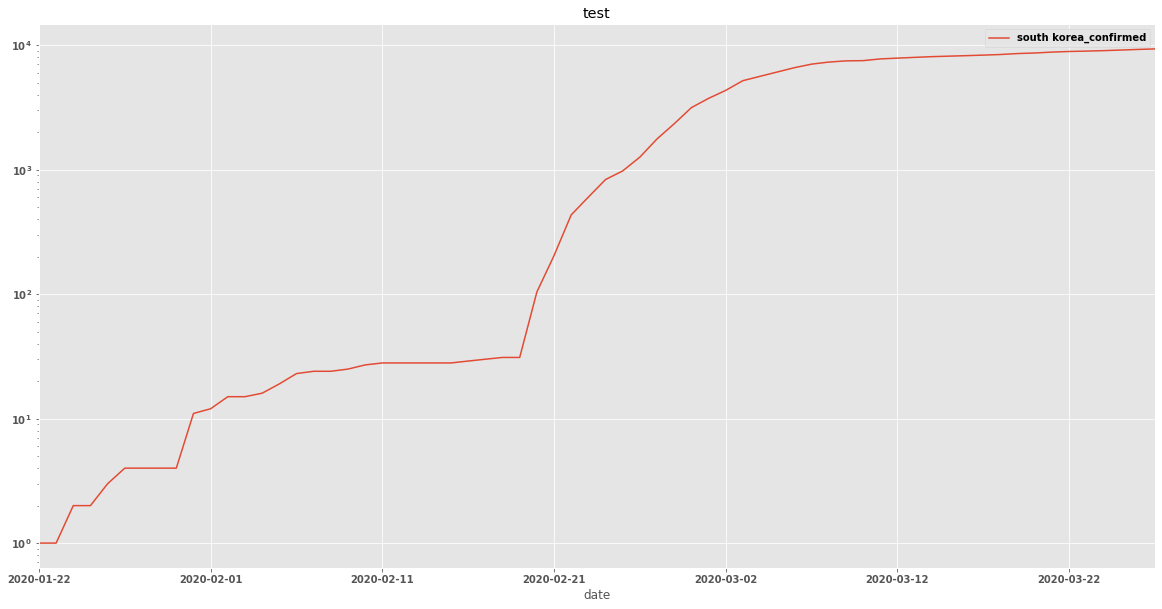

In [88]:
def plot_log(tmp_df, cols):
    fig, ax = plt.subplots(figsize=(20,10))
    tmp_df.groupby(['date'])[cols].sum().plot(ax=ax)
    
    ax.set_title('test')
    ax.set_yscale('log', basey=10)
    fig = ax.get_figure()
#     fig.savefig(os.path.join(image_dir, create_save_file(col, country, 'trendline')))

plot_log(test_df, col_list)
